In [107]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

Описание полей:

LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)

SEX: пол клиента (1 = мужской, 2 = женский )

EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).

MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).

AGE: возраст в годах

PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = 
исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)

BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь

PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре

default - индикатор невозврата денежных средств

Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

### Task1

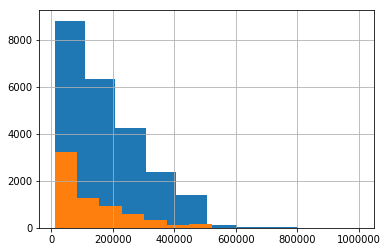

In [108]:
data[data.default == 0].LIMIT_BAL.hist()
data[data.default == 1].LIMIT_BAL.hist()

In [109]:
data = pd.read_csv("credit_card_default_analysis.txt", sep=",")
print data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB
No

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


default = 0 вернул
default = 1 не вернул
Маленькие кредиты не возвращают заметно чаще. 

Распределение случайной величины не похоже на нормальное. Оценивать интервал будем приближённым методом - <b>бутстреп</b>. 

In [110]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [111]:
def1, def0 = data[data.default==1].LIMIT_BAL.values, data[data.default==0].LIMIT_BAL.values

median_def_0_approximated = map(np.median, get_bootstrap_samples(def0, 1000))
median_def_1_approximated = map(np.median, get_bootstrap_samples(def1, 1000))


print "Mediana def = 0 ", stat_intervals(median_def_0_approximated, 0.05)
print "Mediana def = 1 ", stat_intervals(median_def_1_approximated, 0.05)

Mediana def = 0  [ 150000.  150000.]
Mediana def = 1  [ 80000.  90000.]


Интервалы мериан не пересекаются. Строго проверим вероятность равеноства медиан с помощью критерия Манна Уитни

H0: медианные значения равны

H1: медианные значения отличаются

In [112]:
from scipy import stats
print "Вероятность пересечения интервалов pvalue=",  stats.mannwhitneyu(def0, def1, alternative="two-sided").pvalue

Вероятность пересечения интервалов pvalue= 1.22554858182e-189


### Task 2 

SeX (1 = мужской, 2 = женский )

Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)


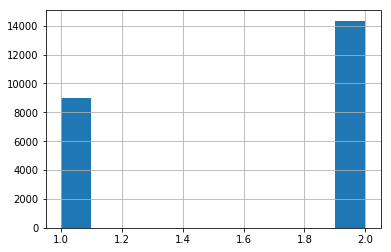

In [113]:
data[data.default == 0].SEX.hist()


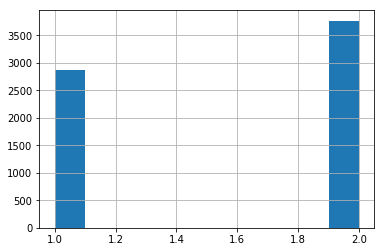

In [114]:
data[data.default == 1].SEX.hist()

In [115]:
import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

In [116]:
subdata_Man = data[data.SEX == 1]
subdata_Women = data[data.SEX == 2]

conf_interval_Man = proportion_confint(sum(subdata_Man.default), 
                                            subdata_Man.shape[0],
                                            method = 'wilson')
conf_interval_Women = proportion_confint(sum(subdata_Women.default), 
                                            subdata_Women.shape[0],
                                            method = 'wilson')

In [117]:
print "conf_interval_Man = ", conf_interval_Man
print "conf_interval_Women = ", conf_interval_Women

conf_interval_Man =  (0.2340610359763117, 0.24945040997857762)
conf_interval_Women =  (0.20191659085963207, 0.21373296513459847)


Два интервала не пересекаются. Значит есть значимые различия. 
Построим доверительный интервал для разности двух долей независимых выборок.

In [118]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    
    return (left_boundary, right_boundary)

In [119]:
print('Conf. int. for difference: [%f, %f]' % proportions_confint_diff_ind(subdata_Man.default, subdata_Women.default))

Conf. int. for difference: [0.024207, 0.043612]


Интервал не включает 0 среднее групп не равны

### Используем статистический Z-критерий для доли для двух независимых выборок.

    H0: гендерный состав не отличается
    H1: гендерный состав отличается


In [120]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [121]:
print('p-value: %.15f' % proportions_diff_z_test(proportions_diff_z_stat_ind(subdata_Man.default, subdata_Women.default)))

p-value: 0.000000000004473


Гипотеза о равенстве гендерного распределния отвергается. Данный результат явлется и практически значимым, т.к. 6% существенная величина для банков.

### Task 3

Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?


(0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных )

In [127]:
education_levels = np.unique(data.EDUCATION.values)
proportions = []
for level in education_levels:
    proportions.append(1 - len(data[data.EDUCATION == level][data.default == 1]) / float(len(data[data.EDUCATION == level])))
    print "Edu lvl ", level, proportions[level]     

Edu lvl  0 1.0
Edu lvl  1 0.807652338214
Edu lvl  2 0.762651461155
Edu lvl  3 0.748423835672
Edu lvl  4 0.943089430894
Edu lvl  5 0.935714285714
Edu lvl  6 0.843137254902


C:\Users\KONYAYEV.MAKSIM\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Самый большай шанс не вернуть креди у бакалавров и выпускников школ.

[0, 6, 0.5, 1]

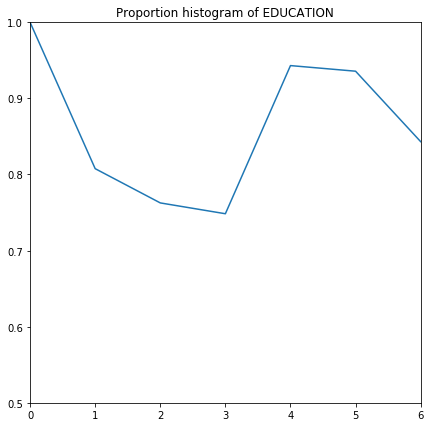

In [128]:
plt.figure(1, figsize=(7,7))
plt.title('Proportion histogram of EDUCATION')
plt.plot(education_levels, proportions)
plt.axis([0, 6, 0.5, 1])

Исходя из графика видно, что распределние не является равномерным, следовательно, образование влияет на то, вернёт ли человек долг. Реже всего возвращают долги категории 2 и 3 (бакалавры и выпускники школ). Возвращают практически все долги только люди с докторской степенью.

Проверим строго то что распределение равноменое. Для этого сгенерируем массив со средней вероятностью возврата кредита и проверим его с реальным распределением по образованию с помощью критерия согласия Пирсона (Хи квадрат)

In [142]:
totalEducCount = []
returnedEducCount = []
#len(data[data.EDUCATION == level][data.default == 1]) / 
for level in education_levels:
    totalEducCount.append(float(len(data[data.EDUCATION == level])))
    returnedEducCount.append(len(data[data.EDUCATION == level][data.default == 0]))

testEducRange = np.array(totalEducCount)* np.mean(proportions)
#print returnedEducCount, testEducRange  
stats.chisquare(returnedEducCount, testEducRange, ddof = 1).pvalue

C:\Users\KONYAYEV.MAKSIM\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


3.6531815951635978e-58

Гипотеза о равномерном распределении возврата кредитов относительно образования отвергается

Task 4

Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение. 

In [144]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [147]:
table_mar = data.pivot_table(index='default', 
     values="LIMIT_BAL", columns='MARRIAGE', aggfunc = len, fill_value=0)
print table_mar
print table_mar.as_matrix()

MARRIAGE   0      1      2    3
default                        
0         49  10453  12623  239
1          5   3206   3341   84
[[   49 10453 12623   239]
 [    5  3206  3341    84]]


In [156]:
#Строго проверим что можно применять коэфициет кореляции Краммера. 
#Для этого выведем значения колонки MARRIAGE показав что она категориальная
print "Уникальные значения колонки MARRIAGE ", np.unique(data.MARRIAGE.values)
print "Уникальные значения колонки default ", np.unique(data.default.values)
print "Коэфициет кореляции Крамера равен ", cramers_stat(table_mar.as_matrix())

 Уникальные значения колонки MARRIAGE  [0 1 2 3]
Уникальные значения колонки default  [0 1]
Коэфициет кореляции Крамера равен  0.0344782036628


Task 5 

Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

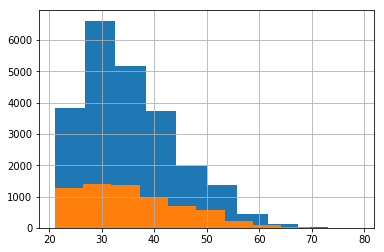

In [161]:
#Выведем графики распределения возрастов для двух груп - вернувших и не вернувших кредиты
data[data.default == 0].AGE.hist()
data[data.default == 1].AGE.hist()

In [169]:
def1, def0 = data[data.default==1].AGE.values, data[data.default==0].AGE.values

print "Средний возраст не вернувших кредит", np.median(def1)
print "Средний возраст вернувших кредит", np.median(def0)

Средний возраст не вернувших кредит 34.0
Средний возраст вернувших кредит 34.0


In [170]:
median_def_0_approximated = map(np.median, get_bootstrap_samples(def0, 1000))
median_def_1_approximated = map(np.median, get_bootstrap_samples(def1, 1000))


print "Интервал медины для колонки AGE в группе вернувших кредит ", stat_intervals(median_def_0_approximated, 0.05)
print "Интервал медины для колонки AGE в группе не вернувших кредит ", stat_intervals(median_def_1_approximated, 0.05)

Интервал медины для колонки AGE в группе вернувших кредит  [ 34.  34.]
Интервал медины для колонки AGE в группе не вернувших кредит  [ 34.  35.]


Используем статистический Z-критерий для доли для двух независимых выборок что бы проверить отличается ли медианы групп вернувших и не вернувших кредит


H0: Мериана возраста не отличается
H1: Мериана возраста отличается

Применим Критерий Манна-Уитни

In [173]:
stats.mannwhitneyu(def1, def0)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.18625177174493079)

Значение p-value довольно большое и не позволяет нам отклонить нулевую гипотезу о равенстве средних.

Возраст не значим для данной скоринговой модели.